# IMDB Movie Reviews

## 1. Data preparation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
pd.set_option("max_colwidth", 400)

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "IMDB_movie_reviews")

In [4]:
df_train_full = pd.read_csv(os.path.join(PATH_DATA, "IMDB_Dataset_cleaned.csv"))
print("Shape:", df_train_full.shape)
df_train_full.head()

Shape: (50000, 2)


,review,sentiment
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,positive
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dre...,positive
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani u grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag ju...,positive
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake i...,negative
4,petter mattei love time money visual stun film watch mr mattei offer u vivid portrait human relat movi seem tell u money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peo...,positive


### 1.1. Tokenization

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
df_train_full["tokens"] = df_train_full["review"].map(word_tokenize)
df_train_full["tokens_total"] = df_train_full["tokens"].map(len)
df_train_full.head()

,review,sentiment,tokens,tokens_total
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,positive,"[one, review, mention, watch, oz, episod, hook, right, exactli, happen, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, show, faint, heart, timid, show, pull, punch, regard, drug, sex, violenc, hardcor, classic, use, word, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cel...",164
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dre...,positive,"[wonder, littl, product, film, techniqu, unassum, oldtimebbc, fashion, give, comfort, sometim, discomfort, sen, realism, entir, piec, actor, extrem, well, chosen, michael, sheen, got, polari, voic, pat, truli, see, seamless, edit, guid, refer, william, diari, entri, well, worth, watch, terrificli, written, perform, piec, master, product, one, great, master, comedi, life, realism, realli, come,...",84
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani u grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag ju...,positive,"[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, lightheart, comedi, plot, simplist, dialogu, witti, charact, likabl, even, well, bread, suspect, serial, killer, may, disappoint, realiz, match, point, risk, addict, thought, proof, woodi, allen, still, fulli, control, style, mani, u, grown, love, would, laugh, one, woodi, comedi, year, dare, say, decad...",84
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake i...,negative,"[basic, there, famili, littl, boy, jake, think, there, zombi, closet, parent, fight, time, movi, slower, soap, opera, suddenli, jake, decid, becom, rambo, kill, zombi, ok, first, go, make, film, must, decid, thriller, drama, drama, movi, watchabl, parent, divorc, argu, like, real, life, jake, closet, total, ruin, film, expect, see, boogeyman, similar, movi, instead, watch, drama, meaningless, ...",66
4,petter mattei love time money visual stun film watch mr mattei offer u vivid portrait human relat movi seem tell u money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peo...,positive,"[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, u, vivid, portrait, human, relat, movi, seem, tell, u, money, power, success, peopl, differ, situat, encount, variat, arthur, schnitzler, play, theme, director, transfer, action, present, time, new, york

### 1.2. Encoding target variable

Transform target variable from text to numeric (1: positive and 0: negative).

In [7]:
target_variable = "sentiment"
df_train_full[target_variable] = df_train_full[target_variable].apply(lambda x: 1 if x == "positive" else 0)
df_train_full.head()

,review,sentiment,tokens,tokens_total
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,1,"[one, review, mention, watch, oz, episod, hook, right, exactli, happen, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, show, faint, heart, timid, show, pull, punch, regard, drug, sex, violenc, hardcor, classic, use, word, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cel...",164
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dre...,1,"[wonder, littl, product, film, techniqu, unassum, oldtimebbc, fashion, give, comfort, sometim, discomfort, sen, realism, entir, piec, actor, extrem, well, chosen, michael, sheen, got, polari, voic, pat, truli, see, seamless, edit, guid, refer, william, diari, entri, well, worth, watch, terrificli, written, perform, piec, master, product, one, great, master, comedi, life, realism, realli, come,...",84
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani u grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag ju...,1,"[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, lightheart, comedi, plot, simplist, dialogu, witti, charact, likabl, even, well, bread, suspect, serial, killer, may, disappoint, realiz, match, point, risk, addict, thought, proof, woodi, allen, still, fulli, control, style, mani, u, grown, love, would, laugh, one, woodi, comedi, year, dare, say, decad...",84
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake i...,0,"[basic, there, famili, littl, boy, jake, think, there, zombi, closet, parent, fight, time, movi, slower, soap, opera, suddenli, jake, decid, becom, rambo, kill, zombi, ok, first, go, make, film, must, decid, thriller, drama, drama, movi, watchabl, parent, divorc, argu, like, real, life, jake, closet, total, ruin, film, expect, see, boogeyman, similar, movi, instead, watch, drama, meaningless, ...",66
4,petter mattei love time money visual stun film watch mr mattei offer u vivid portrait human relat movi seem tell u money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peo...,1,"[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, u, vivid, portrait, human, relat, movi, seem, tell, u, money, power, success, peopl, differ, situat, encount, variat, arthur, schnitzler, play, theme, director, transfer, action, present, time, new, york, differ, charact, meet, connect, o

## 2. Modeling

### 2.1. Take a sample

If there are memory issues, taking a sample is a good option.

In [8]:
SAMPLE_SIZE = 3000

# Getting sample for positive cases
df_sample_positive = df_train_full[df_train_full["sentiment"] == 1].head(int(SAMPLE_SIZE / 2))

# Getting sample for negative cases
df_sample_negative = df_train_full[df_train_full["sentiment"] == 0].head(int(SAMPLE_SIZE / 2))

# Building sample dataset
df_train_full = pd.concat([df_sample_positive, df_sample_negative], axis = 0)
print("Sample shape:", df_train_full.shape)
df_train_full.head()

Sample shape: (3000, 4)


,review,sentiment,tokens,tokens_total
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,1,"[one, review, mention, watch, oz, episod, hook, right, exactli, happen, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, show, faint, heart, timid, show, pull, punch, regard, drug, sex, violenc, hardcor, classic, use, word, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cel...",164
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dre...,1,"[wonder, littl, product, film, techniqu, unassum, oldtimebbc, fashion, give, comfort, sometim, discomfort, sen, realism, entir, piec, actor, extrem, well, chosen, michael, sheen, got, polari, voic, pat, truli, see, seamless, edit, guid, refer, william, diari, entri, well, worth, watch, terrificli, written, perform, piec, master, product, one, great, master, comedi, life, realism, realli, come,...",84
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani u grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag ju...,1,"[thought, wonder, way, spend, time, hot, summer, weekend, sit, air, condit, theater, watch, lightheart, comedi, plot, simplist, dialogu, witti, charact, likabl, even, well, bread, suspect, serial, killer, may, disappoint, realiz, match, point, risk, addict, thought, proof, woodi, allen, still, fulli, control, style, mani, u, grown, love, would, laugh, one, woodi, comedi, year, dare, say, decad...",84
4,petter mattei love time money visual stun film watch mr mattei offer u vivid portrait human relat movi seem tell u money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peo...,1,"[petter, mattei, love, time, money, visual, stun, film, watch, mr, mattei, offer, u, vivid, portrait, human, relat, movi, seem, tell, u, money, power, success, peopl, differ, situat, encount, variat, arthur, schnitzler, play, theme, director, transfer, action, present, time, new, york, differ, charact, meet, connect, one, connect, one, way, anoth, next, person, one, seem, know, previou, point,...",125
5,probabl alltim favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen time last year paul luka perform bring tear eye bett davi one truli sympathet role delight kid grandma say like dressedup midget child make fun watch mother slow awaken what happen world roof believ startl dozen thumb would movi,1,"[probabl, alltim, favorit, movi, stori, selfless, sacrific, dedic, nobl, caus, preachi, bore, never, get, old, despit, seen, time, last, year, paul, luka, perform, bring, tear, eye, bett, davi, one, truli, sympathet, role, delight, kid, grandma, say, like, dressedup, midget, child, make, fun, watch, mother, slow, awaken, what, happen, world, roof, believ, startl, dozen, thumb, wou

### 2.1. Perform TF-IDF Vectorization

Transform text into numbers, due to machine learning algorithms only work with numbers.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

##### Apply tokenization

Defining function to convert text into tokens.

In [10]:
def get_tokens(text):
    tokens = word_tokenize(text)
    return tokens

##### Apply TFIDF Vectorization

In [11]:
tfidfVect = TfidfVectorizer(analyzer = get_tokens)
x_tfidf = tfidfVect.fit_transform(df_train_full["review"].values)
print(x_tfidf.shape)

(3000, 25089)


In [12]:
print(tfidfVect.get_feature_names_out())

['aaa' 'aaahth' 'aaargh' ... 'êtrepeutêtr' 'ís' 'ísnt']


### 2.2. Split data into training and validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df_train_full[target_variable].values

x_train, x_val, y_train, y_val = train_test_split(x_tfidf, y, test_size = 0.2, random_state = 42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_train shape: (2400, 25089)
x_val shape: (600, 25089)
y_train shape: (2400,)
y_val shape: (600,)


### 2.3. Training

In [15]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [16]:
t = time.time()

# Hyperparameter tunning
hyperParameters = { "n_estimators": (80, 100), "max_depth": (4, 7) }
xgb = XGBClassifier(objective = "binary:logistic")
random_search_xg = GridSearchCV(xgb, hyperParameters, refit = True)

# Training
random_search_xg.fit(x_train, y_train)

tt = (time.time() - t)
print("Duration minutes:", tt/60)

Duration minutes: 2.0849695960680643


In [17]:
print("Best hyperparameters:", random_search_xg.best_params_)
print("Best score:", random_search_xg.best_score_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 100}
Best score: 0.7975


### 2.4. Evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [19]:
# Get preidctions
y_pred = random_search_xg.predict(x_val)

# Accuracy
acc = metrics.accuracy_score(y_val, y_pred)

# Precision
pre = metrics.precision_score(y_val, y_pred, average = "weighted")

# Recall
rec = metrics.recall_score(y_val, y_pred, average = "weighted")

# F1
f1 = metrics.f1_score(y_val, y_pred, average = "weighted")

print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", rec)
print("F1-score:", f1)

Accuracy: 0.8283333333333334
Precision: 0.8285030864197531
Recall: 0.8283333333333334
F1-score: 0.8281385137741393



ROC AUC Score: 0.9050661798265632


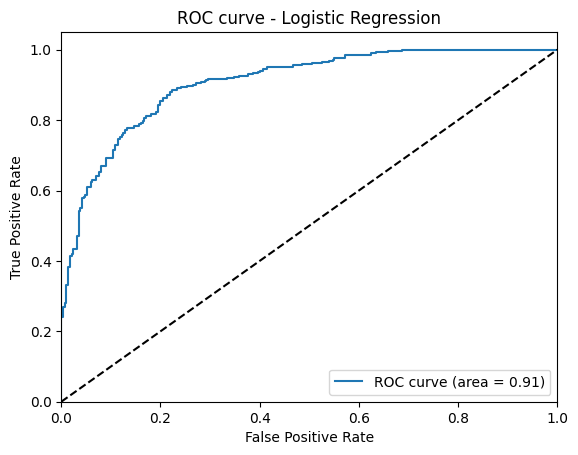

In [20]:
# Probabilities for ROC AUC
y_prob = random_search_xg.predict_proba(x_val)[:, 1]

# ROC AUC Score
roc_auc = roc_auc_score(y_val, y_prob)
print("\nROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure()
plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Logistic Regression")
plt.legend(loc = "lower right")
plt.show()